# Análisis datos + gráficas

Basado en los datos que tenemos, , podemos realizar una serie de análisis y generar gráficos útiles, como:

1. **Tendencias de rendimiento de los equipos a lo largo de las temporadas:** Podemos analizar cómo ha variado el desempeño de los equipos (victorias, derrotas, goles a favor/contra) a lo largo de las temporadas.

2. **Comparación de rendimiento de jugadores:** Se pueden comparar las estadísticas clave de los jugadores, como goles por 90 minutos, asistencias, xG, xA, etc., para identificar a los jugadores más impactantes.

3. **Análisis de partidos de la Champions League:** Podemos explorar las tendencias en los resultados de los partidos, como la cantidad de goles por partido, la frecuencia de los empates, y cómo estos han cambiado a lo largo de los años.

#### Gráfica equipo más exitoso última temporada

c:\Users\albab\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


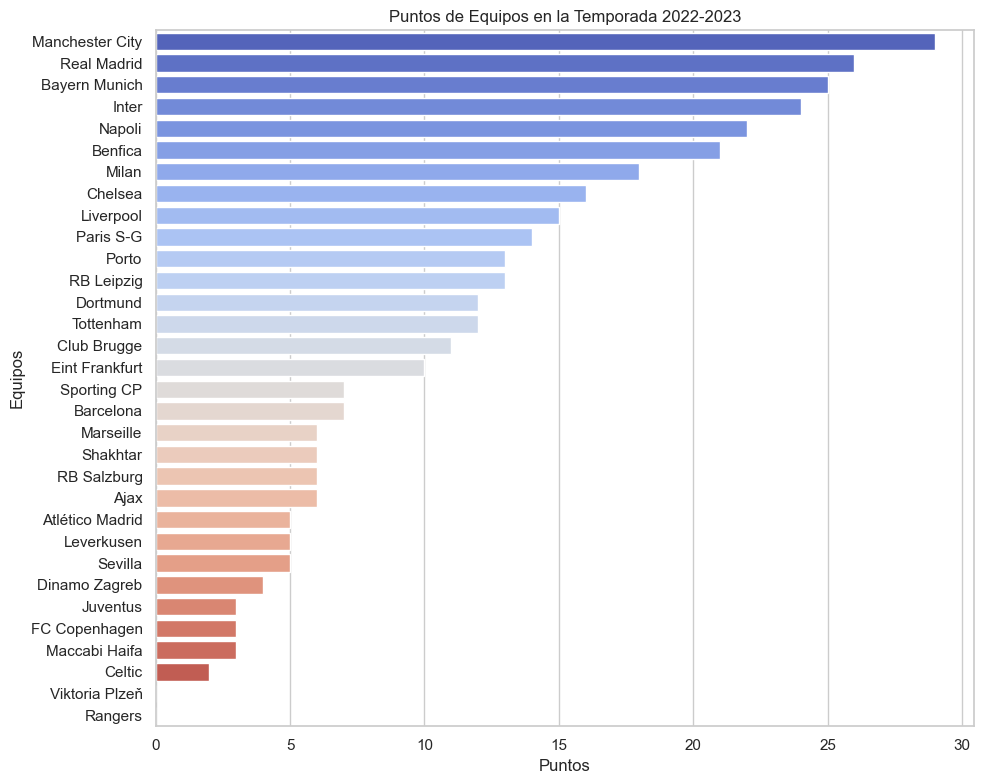

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Establecer estilo de gráficos
sns.set(style="whitegrid")

overall_df =  pd.read_csv('../data/overall_limpio.csv')

# Filtrar los datos de la última temporada disponible en el dataset 'overall'
latest_season = overall_df['Season'].max()
latest_season_data = overall_df[overall_df['Season'] == latest_season]

# Gráfico de los equipos con mayor cantidad de puntos
plt.figure(figsize=(10, 8))
points_plot = sns.barplot(x='Pts', y='Squad', data=latest_season_data.sort_values('Pts', ascending=False), palette="coolwarm")
plt.title(f'Puntos de Equipos en la Temporada {latest_season}')
plt.xlabel('Puntos')
plt.ylabel('Equipos')
plt.tight_layout()

plt.show()

El gráfico muestra la cantidad de puntos obtenidos por cada equipo en la última temporada disponible en el conjunto de datos. Esto proporciona una visión clara de cuáles fueron los equipos más exitosos en términos de resultados acumulados a lo largo de la temporada, destacando a aquellos con el mayor rendimiento en la liga.

#### Gráfica Top 10 Jugadores con Mejor Total de Goles y Asistencias por 90 Minutos

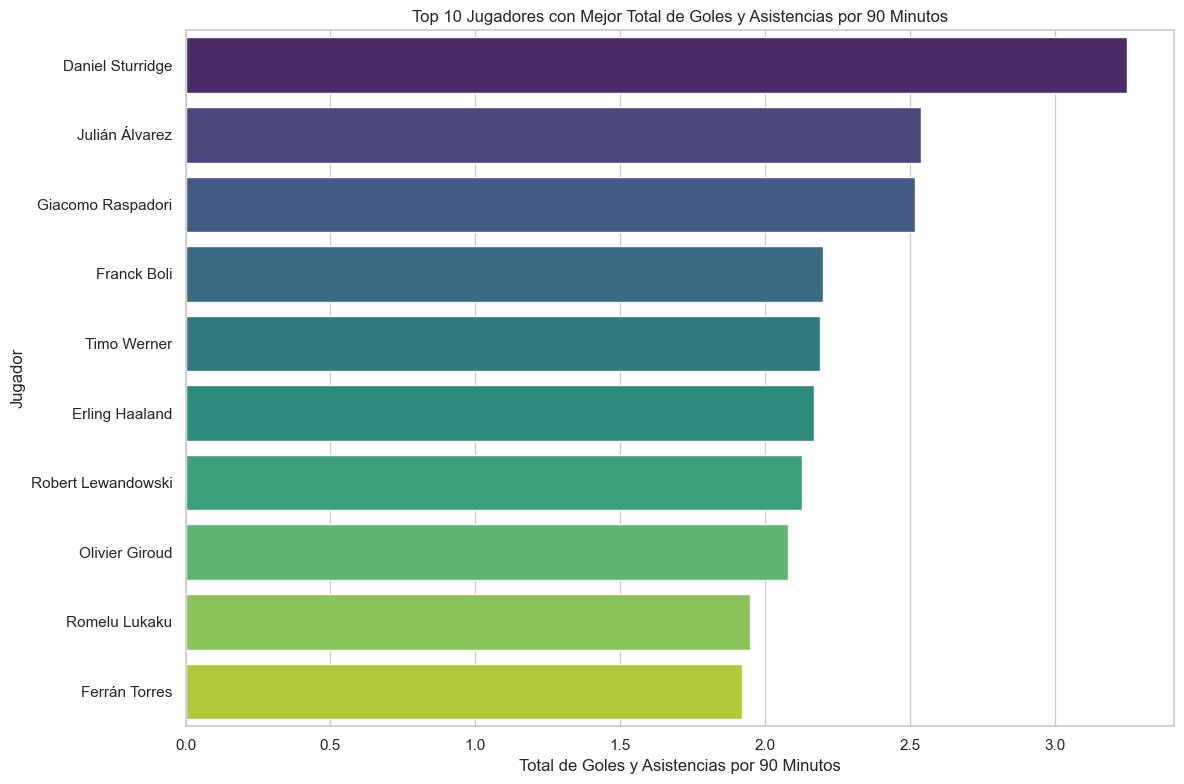

In [2]:
jugadores_df = pd.read_csv('../data/jugadores_limpio.csv')

# Calcular goles y asistencias por 90 minutos para cada jugador
jugadores_df['Total G+A por 90'] = jugadores_df['Gls90.'] + jugadores_df['Ast90']

# Filtrar los jugadores con al menos 5 partidos jugados para asegurar una muestra representativa
jugadores_representativos = jugadores_df[jugadores_df['PJ'] >= 5]

# Obtener los top 10 jugadores con mejores 'Total G+A por 90'
top_jugadores_ga_por_90 = jugadores_representativos.sort_values('Total G+A por 90', ascending=False).head(10)

# Gráfico de los jugadores con mejor 'Total G+A por 90'
plt.figure(figsize=(12, 8))
ga_por_90_plot = sns.barplot(x='Total G+A por 90', y='Jugador', data=top_jugadores_ga_por_90, palette="viridis")
plt.title('Top 10 Jugadores con Mejor Total de Goles y Asistencias por 90 Minutos')
plt.xlabel('Total de Goles y Asistencias por 90 Minutos')
plt.ylabel('Jugador')
plt.tight_layout()

plt.show()

Este gráfico muestra a los 10 jugadores con el mejor total combinado de goles y asistencias por 90 minutos, considerando solo aquellos con al menos 5 partidos jugados para asegurar que la muestra sea representativa. Estos jugadores se destacan por su contribución directa al juego, siendo claves en la creación de oportunidades y la finalización de jugadas.

#### Gráfico tendencia goles por temporada

c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


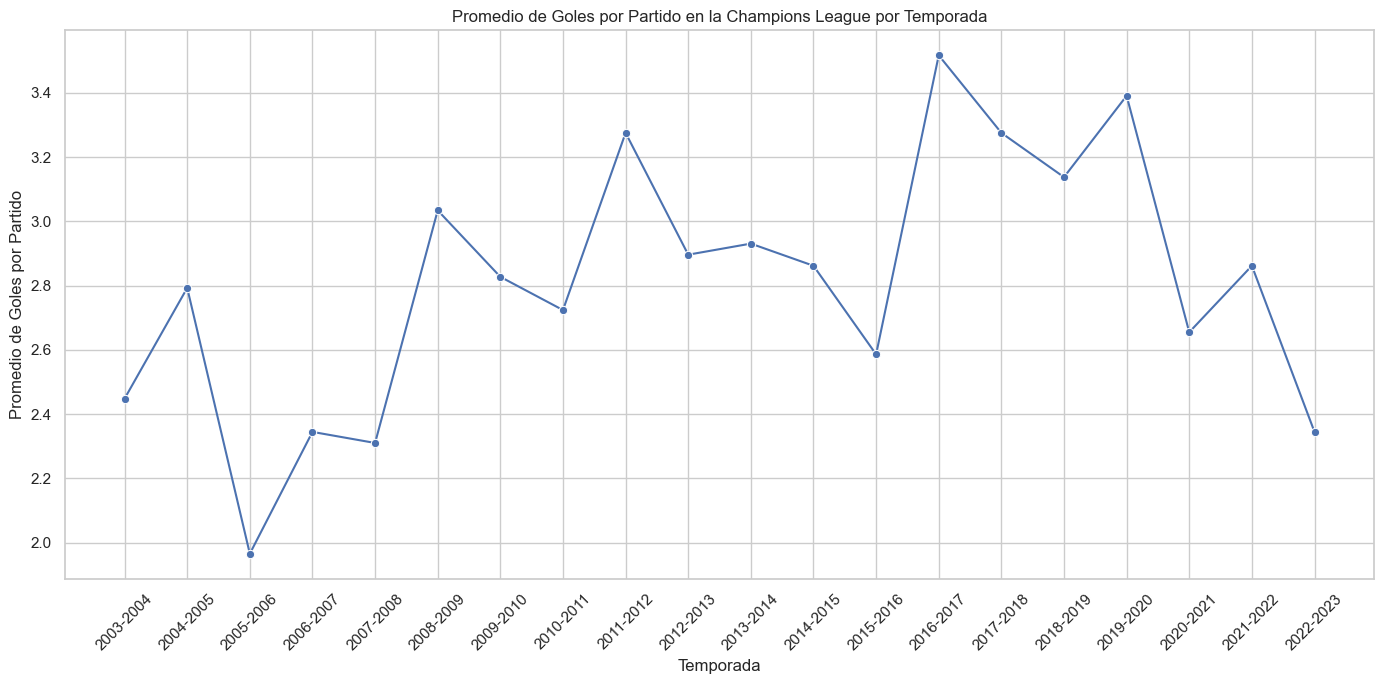

In [3]:
datos_champions_df = pd.read_csv('../data/datos_champions_limpio.csv')
# Corregir el procesamiento de los goles marcados para manejar casos especiales
def procesar_goles(score):
    try:
        partes = score.split('–')
        return int(partes[0]) + int(partes[1])
    except:
        try:
            # Intentar corregir casos donde hay paréntesis (ej. "(4)1")
            partes = score.replace(')', '').split('(')
            return sum(int(parte) for parte in partes if parte.isdigit())
        except:
            # Si hay algún otro formato no anticipado, retornar 0
            return 0

datos_champions_df['Total Goles'] = datos_champions_df['Score'].apply(procesar_goles)

# Calcular nuevamente el promedio de goles por temporada
promedio_goles_por_temporada = datos_champions_df.groupby('Season')['Total Goles'].mean().reset_index()

# Generar nuevamente el gráfico
plt.figure(figsize=(14, 7))
sns.lineplot(x='Season', y='Total Goles', data=promedio_goles_por_temporada, marker='o', color='b')
plt.title('Promedio de Goles por Partido en la Champions League por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Goles por Partido')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Esta visualización permite observar las tendencias en el estilo de juego a lo largo de las temporadas, indicando si los partidos se han vuelto más ofensivos o defensivos con el tiempo.

Otros aspectos en los que ppodemos enfocarnos que nos ayude a estimar el posible ganador de la Champions League de este año son :

1. Análisis de rendimiento de equipos en la última temporada
2. Tendencias históricas de victorias
3. Comparación de los principales goleadores y sus porteros

Comenzamos con  el análisis de rendimiento de equipos en la última temporada disponible, centrándome en los equipos con mejor balance de goles (diferencia entre goles a favor y en contra)

##### Redimiento equipos última temporadas

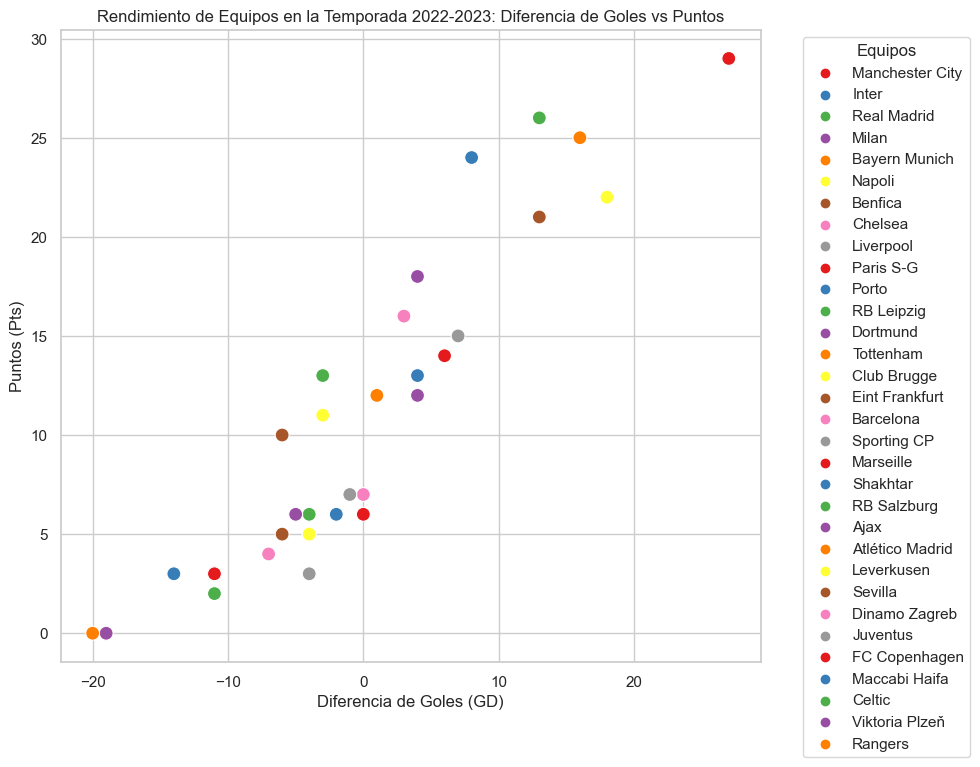

,Squad,GD,Pts
0,Manchester City,27.0,29.0
5,Napoli,18.0,22.0
4,Bayern Munich,16.0,25.0
2,Real Madrid,13.0,26.0
6,Benfica,13.0,21.0


In [4]:
# Análisis de rendimiento de equipos en la última temporada: Diferencia de Goles vs Puntos
# Esto ayudará a identificar equipos fuertes en defensa y ataque, así como su efectividad en ganar partidos.

# Gráfico de dispersión: Diferencia de Goles (GD) vs Puntos (Pts)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='GD', y='Pts', hue='Squad', data=latest_season_data, palette='Set1', s=100)
plt.title(f'Rendimiento de Equipos en la Temporada {latest_season}: Diferencia de Goles vs Puntos')
plt.xlabel('Diferencia de Goles (GD)')
plt.ylabel('Puntos (Pts)')
plt.legend(title='Equipos', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Identificar los equipos con mayor diferencia de goles
top_gd_teams = latest_season_data.nlargest(5, 'GD')[['Squad', 'GD', 'Pts']]
top_gd_teams

El gráfico de dispersión muestra la relación entre la diferencia de goles (GD) y los puntos (Pts) obtenidos por cada equipo en la última temporada disponible. Se observa que los equipos con una mayor diferencia de goles tienden también a tener una mayor cantidad de puntos, lo que sugiere una fuerte correlación entre una sólida ofensiva/defensiva y el éxito en el torneo. Los equipos destacados en este análisis son:

* Manchester City: Con la mayor diferencia de goles (27) y el mayor número de puntos (29).

* Napoli: Significativa diferencia de goles (18) con 22 puntos.

* Bayern Munich: También con un desempeño destacado, con 16 goles de diferencia y 25 puntos.

* Real Madrid y Benfica: Ambos equipos comparten una diferencia de goles de 13, con 26 y 21 puntos respectivamente.

Estos equipos, especialmente Manchester City y Napoli, debido a su superioridad tanto en defensa como en ataque, podrían considerarse fuertes contendientes para ganar la Champions League basándose en el desempeño de la última temporada

#### Gráfica tedencia de éxito en llegar fase final

In [5]:
# Análisis de tendencias históricas de las fases finales
# Identificar cuántas veces los equipos han alcanzado al menos los cuartos de final en las últimas temporadas

# Filtrar datos a partir de los cuartos de final en adelante
fases_finales = overall_df[overall_df['Rk'].isin(['W', 'F', 'SF', 'QF'])]

# Contar cuántas veces cada equipo ha alcanzado cada fase
frecuencia_fases_finales = fases_finales.groupby('Squad')['Rk'].value_counts().unstack(fill_value=0)

# Agregar una columna total para la suma de apariciones en fases finales
frecuencia_fases_finales['Total Apariciones Finales'] = frecuencia_fases_finales.sum(axis=1)

# Ordenar equipos por el total de apariciones en fases finales
equipos_con_mas_apariciones = frecuencia_fases_finales.sort_values('Total Apariciones Finales', ascending=False)

# Top 10 de equipos con más apariciones en fases finales
top_10_finales = equipos_con_mas_apariciones.head(10)

top_10_finales

Rk,F,QF,SF,W,Total Apariciones Finales
Squad,,,,,
Bayern Munich,2,7,4,2,15
Barcelona,0,5,5,4,14
Real Madrid,0,1,6,5,12
Chelsea,1,3,5,2,11
Liverpool,3,2,1,2,8
Manchester City,1,3,2,1,7
Manchester Utd,2,3,1,1,7
Juventus,2,5,0,0,7
Milan,1,2,2,1,6


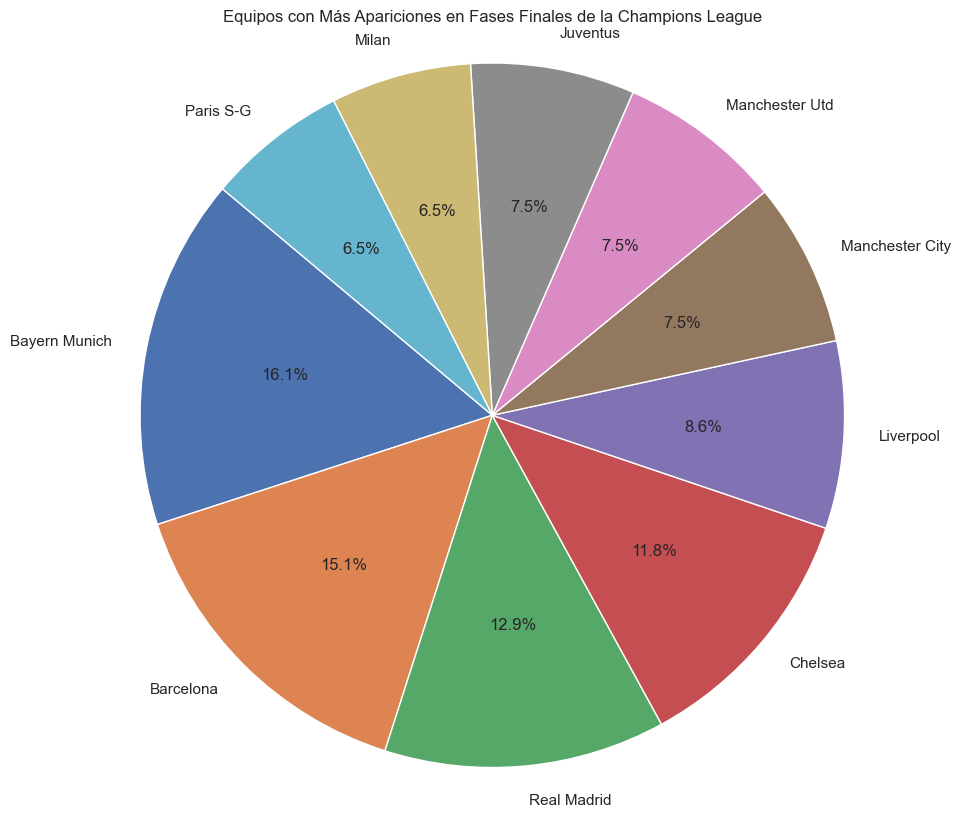

In [6]:
#Gráficamos en una gráfica de sectores los equipos con más apariciones en fases finales
plt.figure(figsize=(10, 10))
plt.pie(top_10_finales['Total Apariciones Finales'], labels=top_10_finales.index, autopct='%1.1f%%', startangle=140)
plt.title('Equipos con Más Apariciones en Fases Finales de la Champions League')
plt.axis('equal')
plt.show()

Basándonos en esta información, equipos como Bayern Munich, Barcelona, y Real Madrid se destacan no solo por su capacidad para alcanzar las etapas finales del torneo sino también por su experiencia en ganar títulos. Esta experiencia y consistencia podrían ser factores clave para su éxito en la Champions League de este año.

Finalmente, considerando el análisis previo sobre el desempeño de los equipos en la última temporada y sus historiales en las fases finales, podemos inferir que equipos como Manchester City y Bayern Munich podrían ser fuertes candidatos para el título de este año, dada su reciente forma y experiencia en el torneo.

#### Gráfica de principales goleadores y porteros

1. **Goleadores:** Identificar los jugadores con la mayor cantidad de goles en la última temporada de la Champions League y su tasa de goles por 90 minutos.

2. **Porteros:** Considerar el desempeño de los porteros en términos de partidos sin recibir goles (clean sheets), ya que una defensa sólida es fundamental en las etapas decisivas del torneo.

In [7]:
# Análisis de porteros: Examinar el desempeño en términos de partidos sin recibir goles (clean sheets)
# Debido a la falta de datos directos sobre clean sheets, utilizaremos la información de los equipos para inferir.

# Consideraremos los equipos destacados previamente y sus porteros
equipos_destacados = ['Manchester City', 'Bayern Munich', 'Real Madrid', 'Chelsea', 'Liverpool']

# Filtrar los datos de la última temporada para estos equipos
porteros_destacados_df = latest_season_data[latest_season_data['Squad'].isin(equipos_destacados)][['Squad', 'Goalkeeper', 'GA', 'MP']]

# Calcular el promedio de goles en contra por partido como indicador de la actuación defensiva
porteros_destacados_df['Goles Contra por Partido'] = porteros_destacados_df['GA'] / porteros_destacados_df['MP']

# Mostrar los datos relevantes
porteros_destacados_df[['Squad', 'Goalkeeper', 'GA', 'Goles Contra por Partido']].sort_values('Goles Contra por Partido')

,Squad,Goalkeeper,GA,Goles Contra por Partido
0,Manchester City,Ederson,5.0,0.384615
4,Bayern Munich,Yann Sommer,6.0,0.600000
7,Chelsea,Kepa Arrizabalaga,9.0,0.900000
2,Real Madrid,Thibaut Courtois,13.0,1.083333
8,Liverpool,Alisson,12.0,1.500000


1. Ederson (Manchester City): Destaca con el promedio más bajo de goles en contra por partido (0.384), indicando una sólida defensa y habilidades excepcionales como portero.

2. Yann Sommer (Bayern Munich): También muestra un buen desempeño con un promedio de 0.600 goles en contra por partido.
Kepa Arrizabalaga (Chelsea): Con un promedio de 0.900 goles en contra por partido, sugiere una actuación defensiva competente.

3. Thibaut Courtois (Real Madrid): Presenta un promedio de 1.083 goles en contra por partido, lo cual sigue siendo respetable a este nivel de competencia.

4. Alisson (Liverpool): Tiene el promedio más alto de goles en contra por partido entre estos equipos (1.500), lo que podría indicar áreas de mejora en la defensa o simplemente reflejar la dificultad de los partidos enfrentados.

Basado en estos análisis de equipos, tendencias históricas y el desempeño de jugadores clave, Manchester City emerge como un fuerte candidato para el título de la Champions League de este año, gracias a su sólida defensa, su capacidad ofensiva, y el rendimiento excepcional de su portero, Ederson. Sin embargo, equipos como Bayern Munich y Real Madrid también muestran características de contendientes fuertes, dado su historial en el torneo y el rendimiento de sus jugadores.

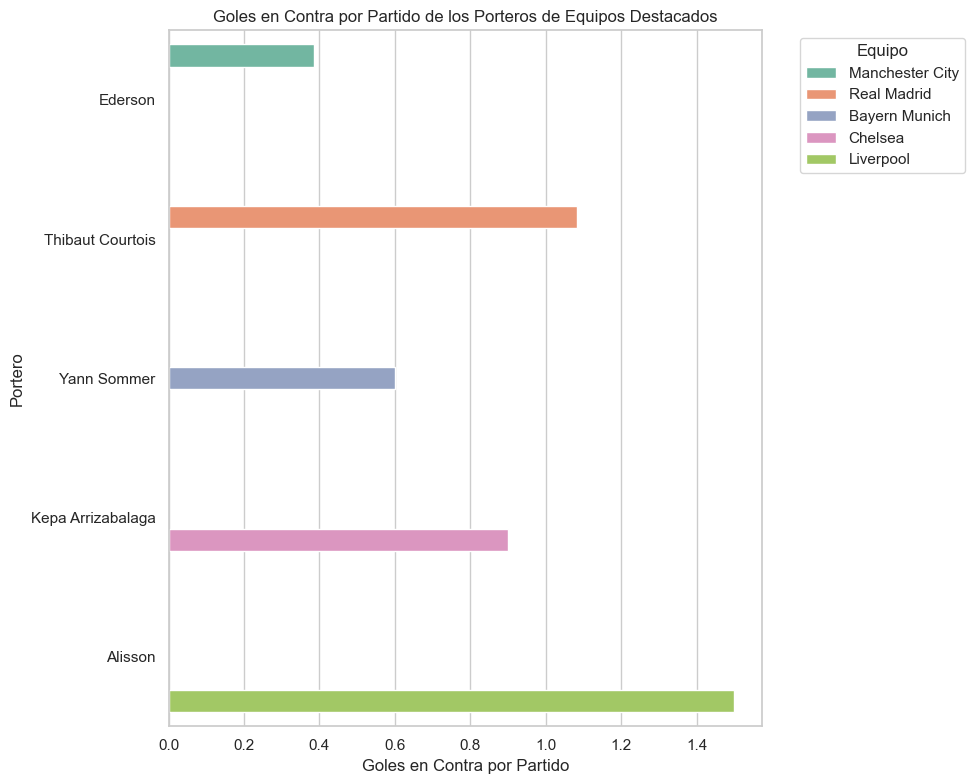

In [8]:
#Graficamos los goles en contra por partido de los porteros de los equipos destacados
plt.figure(figsize=(10, 8))
sns.barplot(x='Goles Contra por Partido', y='Goalkeeper', hue='Squad', data=porteros_destacados_df, palette='Set2')
plt.title('Goles en Contra por Partido de los Porteros de Equipos Destacados')
plt.xlabel('Goles en Contra por Partido')
plt.ylabel('Portero')
plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

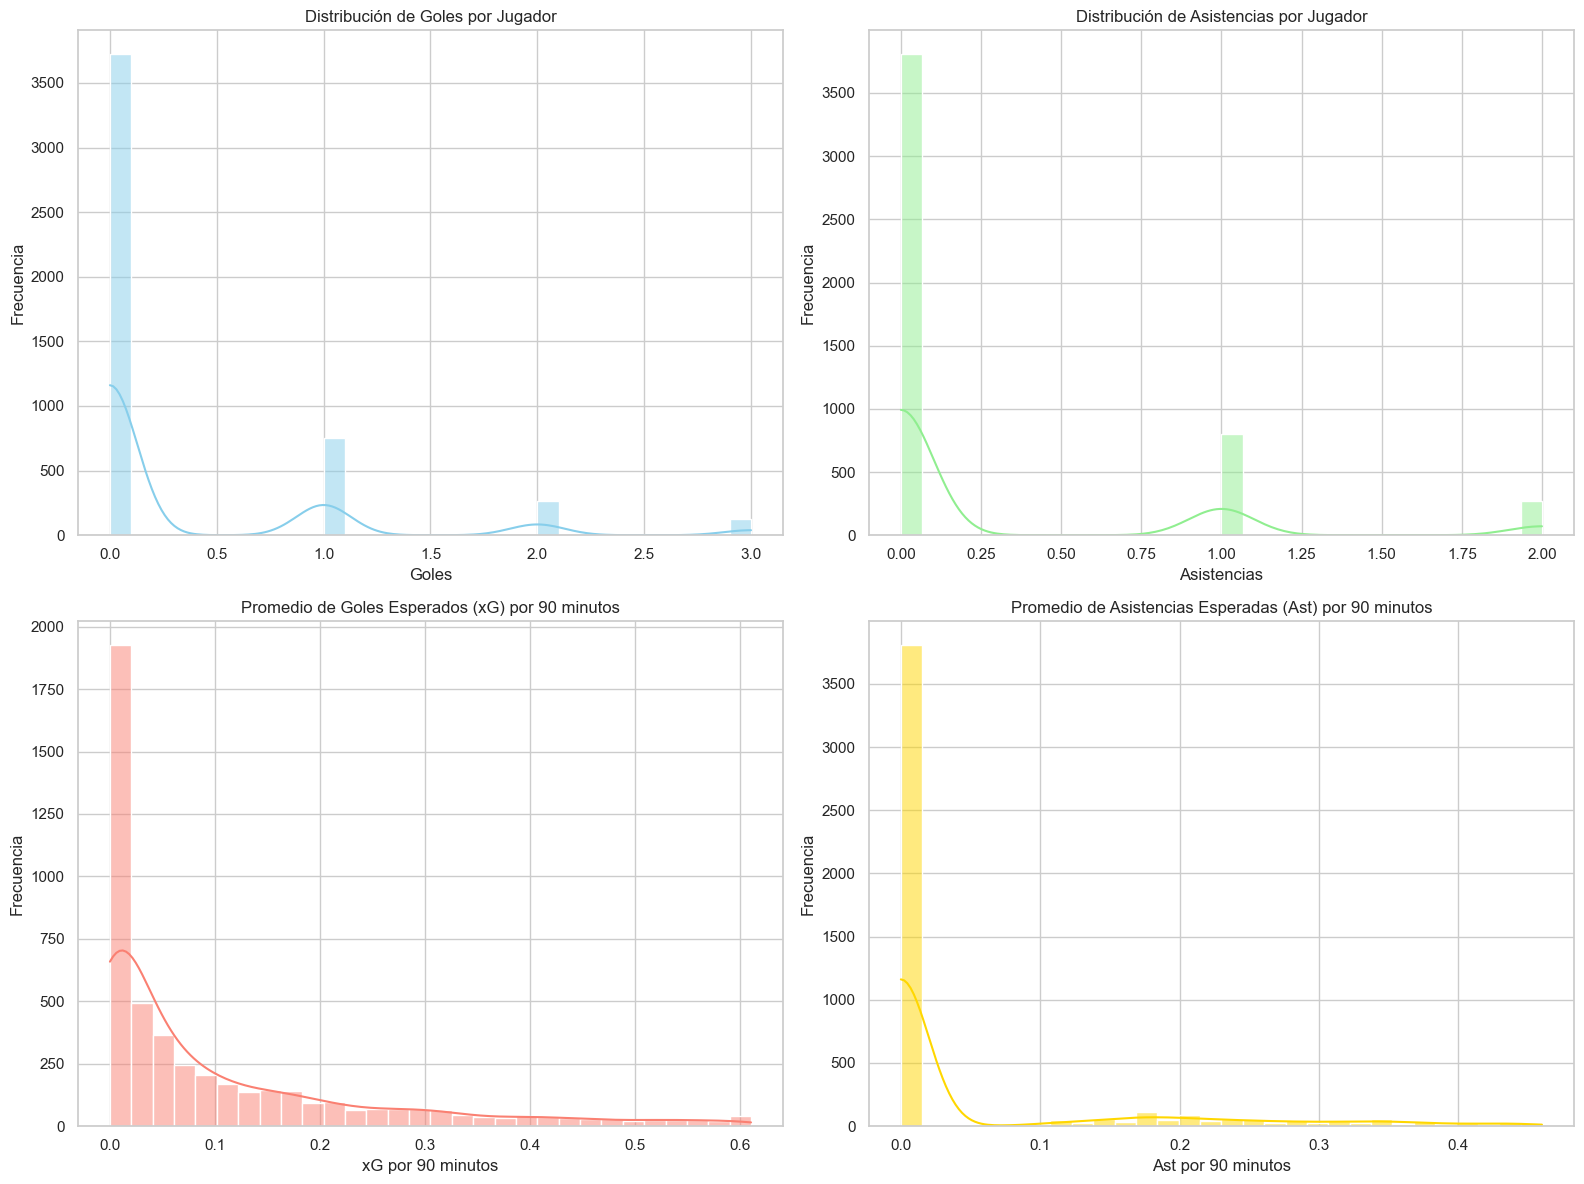

In [9]:
jugadores= pd.read_csv('../data/jugadores_limpio.csv')

# Configuración de las visualizaciones
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Ajustes para mejorar la visualización, eliminando valores extremos
percentile_95_gls = jugadores['Gls.'].quantile(0.95)
percentile_95_ass = jugadores['Ass'].quantile(0.95)
percentile_95_xG90 = jugadores['xG90'].quantile(0.95)
percentile_95_Ast90 = jugadores['Ast90'].quantile(0.95)

# 1. Distribución de Goles por Jugador
sns.histplot(jugadores[jugadores['Gls.'] <= percentile_95_gls]['Gls.'], bins=30, ax=axs[0, 0], kde=True, color='skyblue')
axs[0, 0].set_title('Distribución de Goles por Jugador')
axs[0, 0].set_xlabel('Goles')
axs[0, 0].set_ylabel('Frecuencia')

# 2. Distribución de Asistencias por Jugador
sns.histplot(jugadores[jugadores['Ass'] <= percentile_95_ass]['Ass'], bins=30, ax=axs[0, 1], kde=True, color='lightgreen')
axs[0, 1].set_title('Distribución de Asistencias por Jugador')
axs[0, 1].set_xlabel('Asistencias')
axs[0, 1].set_ylabel('Frecuencia')

# 3. Promedio de Goles Esperados (xG) por 90 minutos
sns.histplot(jugadores[jugadores['xG90'] <= percentile_95_xG90]['xG90'], bins=30, ax=axs[1, 0], kde=True, color='salmon')
axs[1, 0].set_title('Promedio de Goles Esperados (xG) por 90 minutos')
axs[1, 0].set_xlabel('xG por 90 minutos')
axs[1, 0].set_ylabel('Frecuencia')

# 4. Promedio de Asistencias Esperadas (Ast) por 90 minutos
sns.histplot(jugadores[jugadores['Ast90'] <= percentile_95_Ast90]['Ast90'], bins=30, ax=axs[1, 1], kde=True, color='gold')
axs[1, 1].set_title('Promedio de Asistencias Esperadas (Ast) por 90 minutos')
axs[1, 1].set_xlabel('Ast por 90 minutos')
axs[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


#### Análisis de cada una de las gráficas:

Distribución de Goles por Jugador:

* La mayoría de los jugadores tienen una cantidad baja de goles, con una frecuencia alta para los que han anotado cero o un gol.

* La distribución disminuye rápidamente, lo que indica que hay pocos jugadores que logran marcar una cantidad significativa de goles.

Distribución de Asistencias por Jugador:

* Al igual que con los goles, la mayoría de los jugadores registran pocas asistencias, siendo los valores bajos los más frecuentes.

* Existen picos menores para valores superiores de asistencias, pero son claramente menos comunes.

Promedio de Goles Esperados (xG) por 90 minutos:

* La distribución de xG por 90 minutos muestra que la mayoría de los jugadores tienen valores bajos, con una caída significativa después del primer intervalo.

* Esto sugiere que aunque muchos jugadores están en posiciones para anotar, la calidad y la cantidad de esas oportunidades varían mucho.

Promedio de Asistencias Esperadas (Ast) por 90 minutos:

* La distribución del promedio de Ast por 90 minutos tiene una forma similar a la distribución de xG, con la mayoría de los jugadores generando un bajo promedio de asistencias esperadas por juego.

* La caída en la frecuencia después del primer intervalo es pronunciada, lo que resalta que las asistencias de alta calidad son una contribución rara entre los jugadores.

In [10]:
partidos=pd.read_csv('../data/partidos_limpio.csv')

In [11]:

#Deteminar donde se gana con mayor posibilidad
def determine_winner(row):
    home_goals, away_goals = map(int, row['Score'].split('-'))
    if home_goals > away_goals:
        return 'Home'
    elif away_goals > home_goals:
        return 'Away'
    else:
        return 'Draw'

# Apply the function to the dataframe
partidos['Winner'] = partidos.apply(determine_winner, axis=1)

# Calculate the win statistics
win_stats = partidos['Winner'].value_counts(normalize=True) * 100

win_stats

Winner
Home    49.128920
Away    29.094077
Draw    21.777003
Name: proportion, dtype: float64

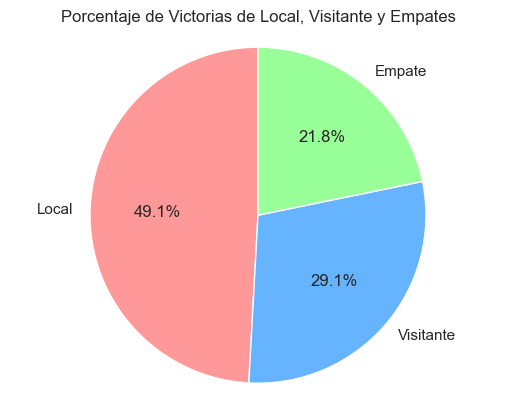

In [12]:
#Lo representamos graficamente
labels_es = ['Local', 'Visitante', 'Empate']
sizes = win_stats.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels_es, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Porcentaje de Victorias de Local, Visitante y Empates')
plt.show()